In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels as sms
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [255]:
revised_data_us_zips=pd.read_csv("revised_data_us_zips.csv")
revised_loopnet_data_ca = pd.read_csv("revised_loopnet_data_ca.csv")

merged = pd.merge(left = revised_loopnet_data_ca, right = revised_data_us_zips, left_on = "zip" ,
                   right_on ="zip", how = "outer")
merged

,id_x,zip,address,price_usd,size_sf,no_stories,property_type,year_built,year_renovated,parking_ratio,...,gross_rent_multiplier,id_y,city,state_id,state_name,density,county_name,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1.0,90066,"4077 McLaughlin Ave, Los Angeles, CA 90066 - M...",3895000,8156,2,Multifamily,1964,\N,1.72,...,14.35,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
1,14.0,90066,"3451 Beethoven St, Los Angeles, CA 90066 - Mul...",2000000,2700,2,Multifamily,1961,\N,1.11,...,18,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
2,67.0,90066,"3814 Lyceum Ave, Los Angeles, CA 90066 - Multi...",1395000,1624,1,Multifamily,1953,\N,\N,...,\N,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
3,74.0,90066,"4417 Campbell Dr, Los Angeles, CA 90066 - Mult...",2350000,3646,2,Multifamily,1928,1990,1.1,...,13.46,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
4,161.0,90066,"3611 S Centinela Ave, Los Angeles, CA 90066 - ...",4150000,7266,2,Multifamily,1988,\N,2.2,...,16.2,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11904,NaN,99923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,33117,Hyder,AK,Alaska,0.3,Prince of Wales-Hyder,NaN,NaN,NaN
11905,NaN,99925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,33118,Klawock,AK,Alaska,6.3,Prince of Wales-Hyder,NaN,NaN,NaN
11906,NaN,99926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,33119,Metlakatla,AK,Alaska,4.8,Prince of Wales-Hyder,NaN,NaN,NaN
11907,NaN,99927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,33120,Point Baker,AK,Alaska,0,Prince of Wales-Hyder,NaN,NaN,NaN


In [256]:
merged=merged.replace(to_replace="\\N",value=np.nan)
merged.replace([np.inf, -np.inf], np.nan, inplace = True)
merged.drop(["Unnamed: 7","Unnamed: 8","Unnamed: 9","year_renovated"],
        axis=1,inplace=True)
merged.dropna(inplace = True)

merged

,id_x,zip,address,price_usd,size_sf,no_stories,property_type,year_built,parking_ratio,no_units,lot_size_ac,building_class,cap_rate,gross_rent_multiplier,id_y,city,state_id,state_name,density,county_name
0,1.0,90066,"4077 McLaughlin Ave, Los Angeles, CA 90066 - M...",3895000,8156,2,Multifamily,1964,1.72,10,0.16,B,4.88,14.35,30059,Los Angeles,CA,California,4642,Los Angeles
4,161.0,90066,"3611 S Centinela Ave, Los Angeles, CA 90066 - ...",4150000,7266,2,Multifamily,1988,2.2,9,0.15,B,3.98,16.2,30059,Los Angeles,CA,California,4642,Los Angeles
15,927.0,90066,"12747 Mitchell Ave, Los Angeles, CA 90066 - Mu...",2195000,3062,1,Multifamily,1962,1.96,5,0.16,C,3,22.88,30059,Los Angeles,CA,California,4642,Los Angeles
54,166435.0,90066,"4320 S Centinela Ave, Los Angeles, CA 90066 - ...",7995000,21268,3,Multifamily,1990,0.71,15,0.24,B,3.45,16.92,30059,Los Angeles,CA,California,4642,Los Angeles
58,168418.0,90066,"11411 Washington Pl, Los Angeles, CA 90066 - M...",1600000,3000,2,Multifamily,1952,1.33,4,0.11,C,3.26,18.28,30059,Los Angeles,CA,California,4642,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8625,166269.0,91501,"550 E Providencia Ave, Burbank, CA 91501 - Mul...",2300000,5768,2,Multifamily,1977,0.87,5,0.16,C,3.53,18.8,30250,Burbank,CA,California,1996.1,Los Angeles
8626,166270.0,91501,"603 S 6th St, Burbank, CA 91501 - FULLY RENOVA...",999000,2026,1,Multifamily,1948,1.48,2,0.16,C,4.52,16.17,30250,Burbank,CA,California,1996.1,Los Angeles
8893,164355.0,90270,"5418 Gifford Ave, Maywood, CA 90270 - Multifam...",795000,1728,1,Multifamily,1936,3.47,3,0.14,C,5.75,13.52,30095,Maywood,CA,California,8350.2,Los Angeles
8905,175530.0,90240,"7348-7350 Florence Avenue, Downey, CA 90240 - ...",5500000,15576,2,Multifamily,1960,2.57,20,0.94,C,4.08,14.5,30080,Downey,CA,California,3464.1,Los Angeles


In [257]:
merged.columns

Index(['id_x', 'zip', 'address', 'price_usd', 'size_sf', 'no_stories',
       'property_type', 'year_built', 'parking_ratio', 'no_units',
       'lot_size_ac', 'building_class', 'cap_rate', 'gross_rent_multiplier',
       'id_y', 'city', 'state_id', 'state_name', 'density', 'county_name'],
      dtype='object')

In [258]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 0 to 9060
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_x                   692 non-null    float64
 1   zip                    692 non-null    int64  
 2   address                692 non-null    object 
 3   price_usd              692 non-null    object 
 4   size_sf                692 non-null    object 
 5   no_stories             692 non-null    object 
 6   property_type          692 non-null    object 
 7   year_built             692 non-null    object 
 8   parking_ratio          692 non-null    object 
 9   no_units               692 non-null    object 
 10  lot_size_ac            692 non-null    object 
 11  building_class         692 non-null    object 
 12  cap_rate               692 non-null    object 
 13  gross_rent_multiplier  692 non-null    object 
 14  id_y                   692 non-null    int64  
 15  city 

In [259]:
merged.isnull().sum()

id_x                     0
zip                      0
address                  0
price_usd                0
size_sf                  0
no_stories               0
property_type            0
year_built               0
parking_ratio            0
no_units                 0
lot_size_ac              0
building_class           0
cap_rate                 0
gross_rent_multiplier    0
id_y                     0
city                     0
state_id                 0
state_name               0
density                  0
county_name              0
dtype: int64

In [260]:
merged.describe()

,id_x,zip,id_y
count,692.000000,692.000000,692.000000
mean,71350.650289,90484.621387,30104.949422
std,80625.244759,562.745146,84.386706
min,1.000000,90002.000000,30004.000000
25%,441.250000,90032.000000,30032.000000
50%,2554.500000,90243.000000,30082.000000
75%,166269.250000,90813.000000,30169.000000
max,178715.000000,91803.000000,30309.000000


# Regression

In [261]:
df=merged.copy()

In [262]:
df.iloc[:,3:6]=df.iloc[:,3:6].astype('float')
df.iloc[:,7:11]=df.iloc[:,7:11].astype('float')
df.iloc[:,12:14]=df.iloc[:,12:14].astype('float')
df.iloc[:,18]=df.iloc[:,18].astype('float')

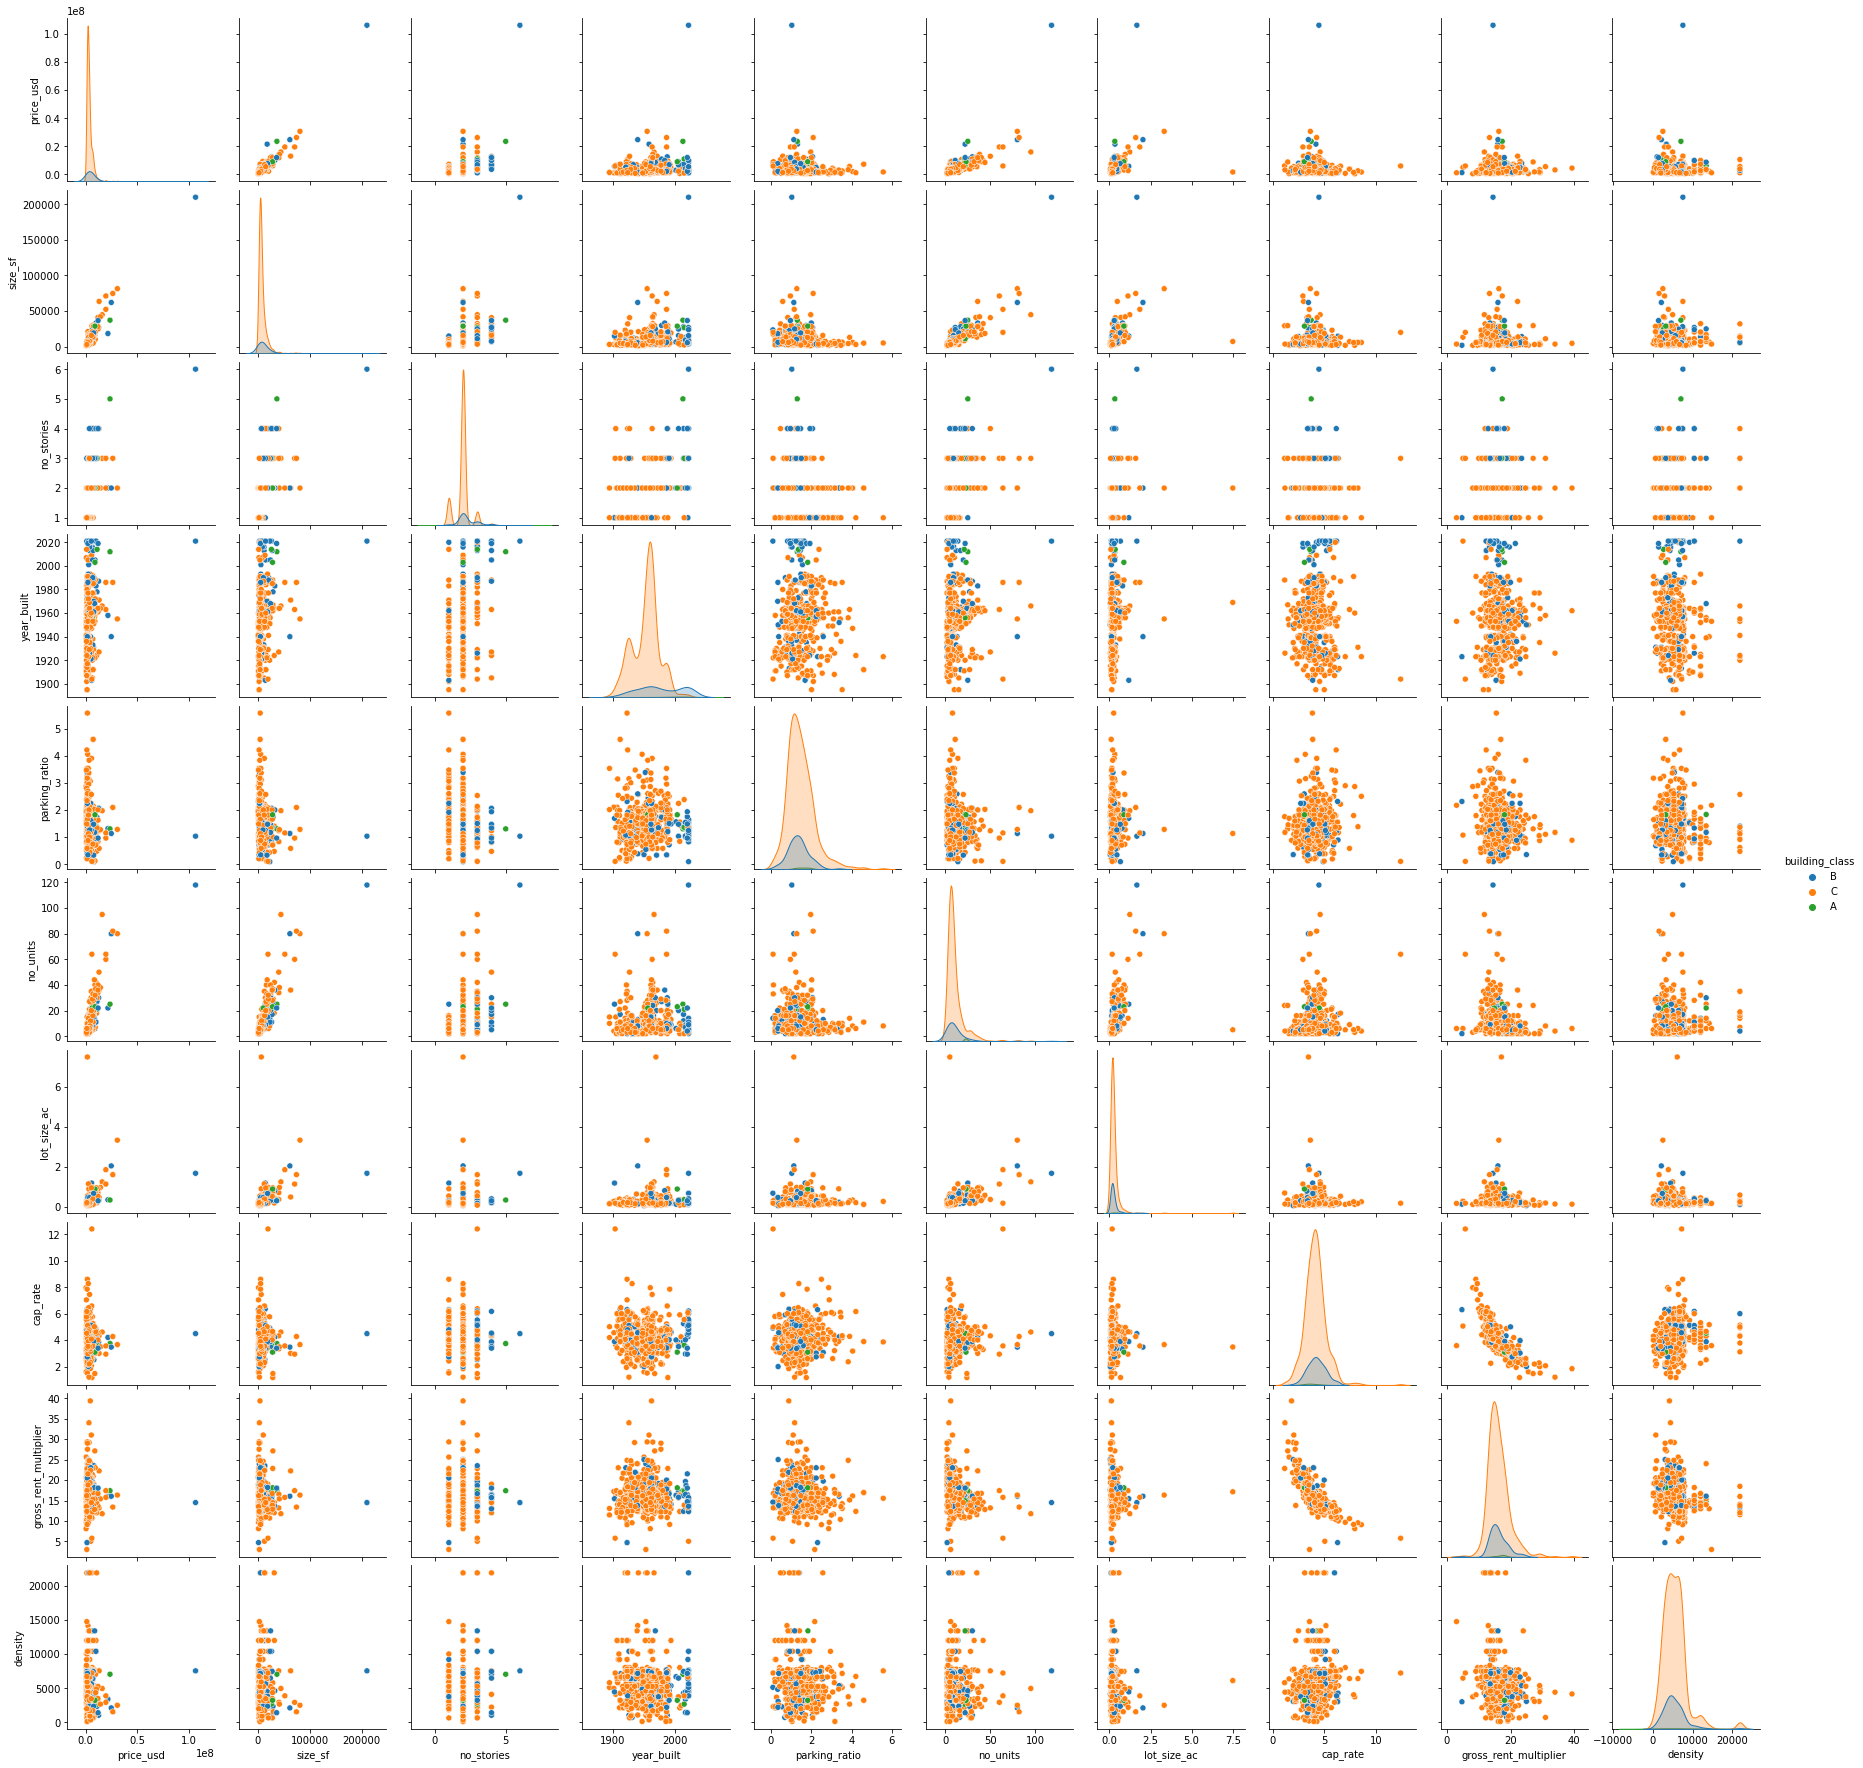

In [263]:
sns.pairplot(df, vars=['price_usd', 'size_sf', 'no_stories','year_built','parking_ratio',
       'no_units', 'lot_size_ac','cap_rate',
       'gross_rent_multiplier', 'density'], hue='building_class')

## Transforming data

-0.2365702270166819


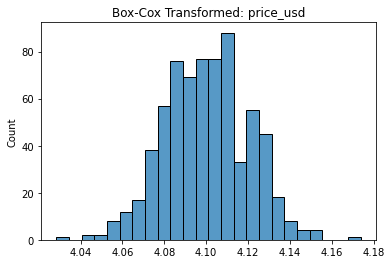

In [264]:
import scipy
bc_price_usd,lambda_price_usd = scipy.stats.boxcox(df["price_usd"])
print(lambda_price_usd)

sns.histplot(bc_price_usd)
plt.title("Box-Cox Transformed: price_usd")
plt.show()
df["price_usd"]=bc_price_usd

-0.3400913234611261


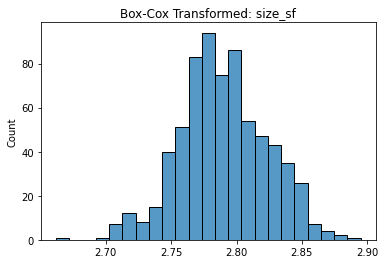

In [265]:
bc_size_sf,lambda_size_sf = scipy.stats.boxcox(df["size_sf"])
print(lambda_size_sf)

sns.histplot(bc_size_sf)
plt.title("Box-Cox Transformed: size_sf")
plt.show()
df["size_sf"]=bc_size_sf

0.4450553787704547


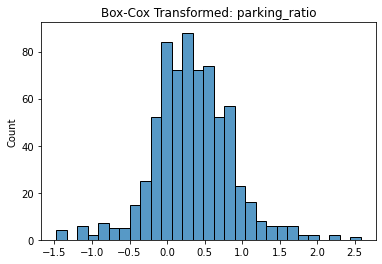

In [266]:
bc_parking_ratio,lambda_parking_ratio = scipy.stats.boxcox(df["parking_ratio"])
print(lambda_parking_ratio)

sns.histplot(bc_parking_ratio)
plt.title("Box-Cox Transformed: parking_ratio")
plt.show()
df["parking_ratio"]=bc_parking_ratio

-0.30163111278676163


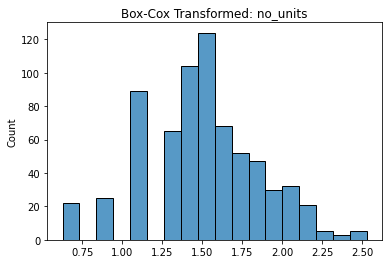

In [267]:
bc_no_units,lambda_no_units = scipy.stats.boxcox(df["no_units"])
print(lambda_no_units)

sns.histplot(bc_no_units)
plt.title("Box-Cox Transformed: no_units")
plt.show()
df["no_units"]=bc_no_units

-0.601332355993567


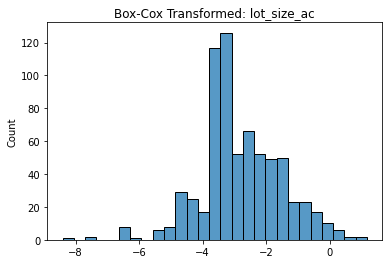

In [268]:
bc_lot_size_ac,lambda_lot_size_ac = scipy.stats.boxcox(df["lot_size_ac"])
print(lambda_lot_size_ac)

sns.histplot(bc_lot_size_ac)
plt.title("Box-Cox Transformed: lot_size_ac")
plt.show()
df["lot_size_ac"]=bc_lot_size_ac

0.4558576406914218


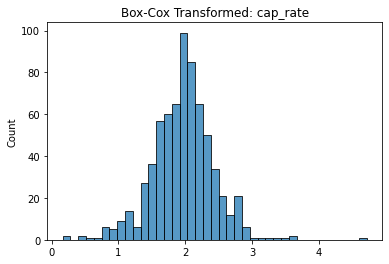

In [269]:
bc_cap_rate,lambda_cap_rate = scipy.stats.boxcox(df["cap_rate"])
print(lambda_cap_rate)

sns.histplot(bc_cap_rate)
plt.title("Box-Cox Transformed: cap_rate")
plt.show()
df["cap_rate"]=bc_cap_rate

0.3715807359123836


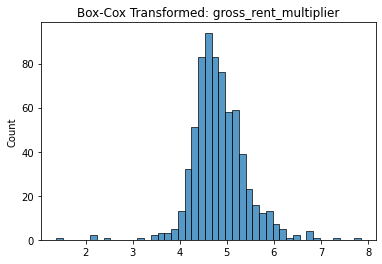

In [270]:
bc_gross_rent_multiplier,lambda_gross_rent_multiplier = scipy.stats.boxcox(df["gross_rent_multiplier"])
print(lambda_gross_rent_multiplier)

sns.histplot(bc_gross_rent_multiplier)
plt.title("Box-Cox Transformed: gross_rent_multiplier")
plt.show()
df["gross_rent_multiplier"]=bc_gross_rent_multiplier

0.34078657157061193


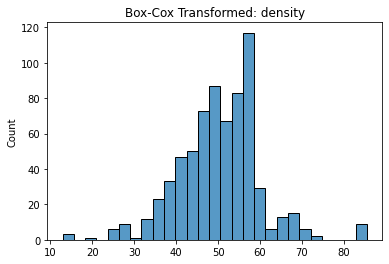

In [271]:
bc_density,lambda_density = scipy.stats.boxcox(df["density"])
print(lambda_density)

sns.histplot(bc_density)
plt.title("Box-Cox Transformed: density")
plt.show()
df["density"]=bc_density

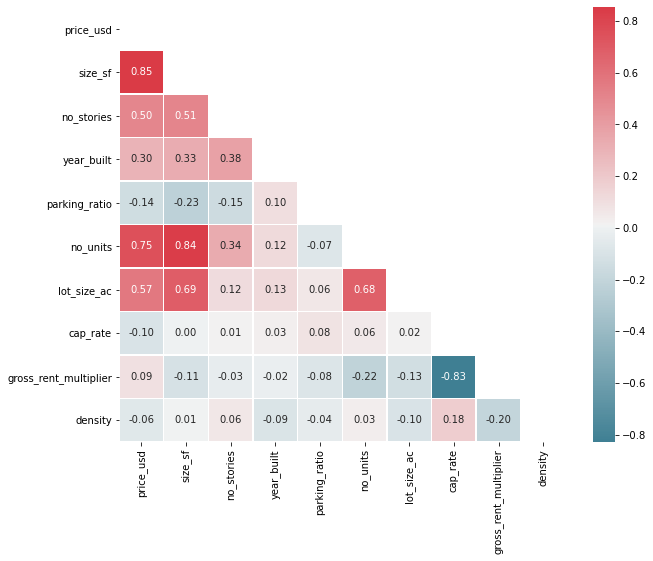

In [272]:
sub_df =  df[['price_usd', 'size_sf', 'no_stories','year_built','parking_ratio',
       'no_units', 'lot_size_ac','cap_rate',
       'gross_rent_multiplier', 'density']]
corr = sub_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = colormap, linewidths =0.5, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

In [285]:
# Specify the Model
mr_mod = smf.ols(formula='price_usd ~ size_sf + no_stories + year_built + parking_ratio + no_units + lot_size_ac + cap_rate + gross_rent_multiplier+ density', data=df)

# Fit the Model
mr_fit = mr_mod.fit()
# Type: dir(ols_fit) to look at other accessible attributes

# Look at the Model Fit Summary
print(mr_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     307.1
Date:                Fri, 04 Mar 2022   Prob (F-statistic):          3.64e-233
Time:                        20:28:45   Log-Likelihood:                 2286.3
No. Observations:                 692   AIC:                            -4553.
Df Residuals:                     682   BIC:                            -4507.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.86

## The diagnostic plots

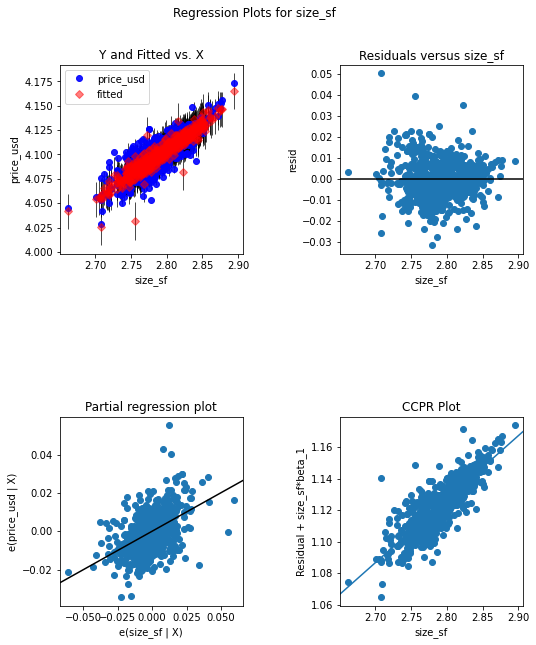

In [286]:
fig = sm.graphics.plot_regress_exog(mr_fit, "size_sf")
fig.set_figheight(10)
fig.set_figwidth(8)
plt.show()

[Text(0.5, 33.0, 'Predicted'), Text(288.49090909090904, 0.5, 'Residuals')]

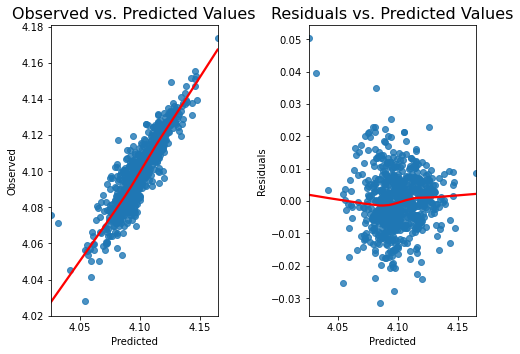

In [287]:
# Plot y vs y_hat
fig, ax = plt.subplots(1,2,figsize=(8, 6))
fig.tight_layout(pad=6.0)
sns.regplot(x=mr_fit.fittedvalues, y=df['price_usd'], lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
ax[0].set(xlabel='Predicted', ylabel='Observed')

sns.regplot(x=mr_fit.fittedvalues, y=mr_fit.resid, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
ax[1].set(xlabel='Predicted', ylabel='Residuals')

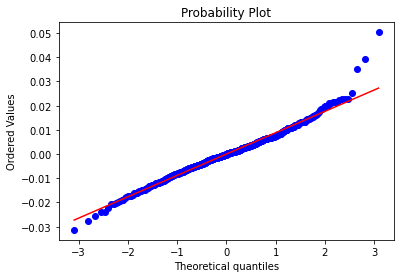

In [288]:
# QQ Plot (Normal Probability) 
import scipy as sp
figA, axA = plt.subplots(figsize=(6,4))
_, (__, ___, r) = sp.stats.probplot(mr_fit.resid, plot = axA, fit=True)

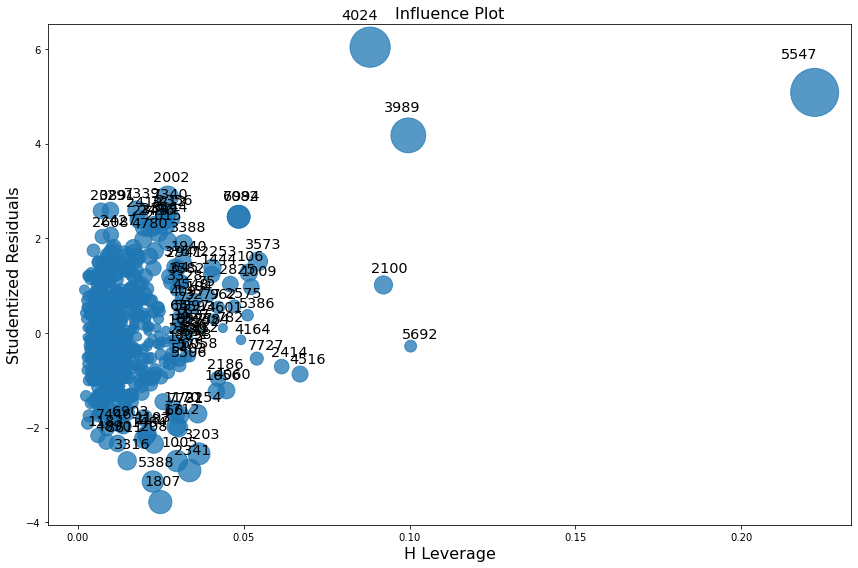

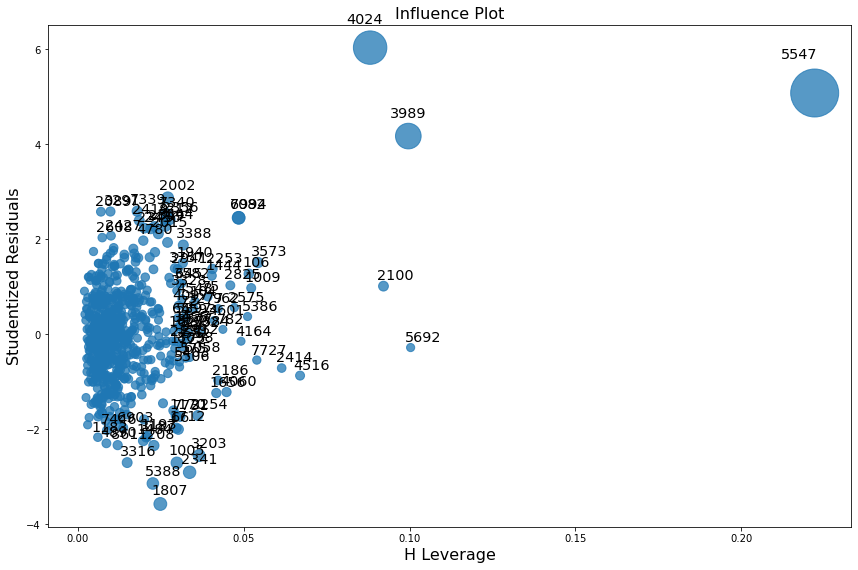

In [289]:
# Outliers, high leverage, influential obs
figd, ax = plt.subplots(figsize=(12,8))
figd = sm.graphics.influence_plot(mr_fit, ax = ax, criterion="DFFITS")
figd.tight_layout(pad=1.0)

fige, ax = plt.subplots(figsize=(12,8))
fige = sm.graphics.influence_plot(mr_fit, ax = ax, criterion="cooks")
fige.tight_layout(pad=1.0)

In [290]:
# VIF: Test for multicolinearity
import statsmodels.stats.outliers_influence as smo
import patsy as pt

# extract matrices using patsy:
y, X = pt.dmatrices('price_usd ~ size_sf + no_stories + year_built + parking_ratio + no_units + lot_size_ac + cap_rate + gross_rent_multiplier+ density',
                    data=df, return_type='dataframe')

# get VIF:
K = X.shape[1]
VIF = np.empty(K)
for i in range(K):
    VIF[i] = smo.variance_inflation_factor(X.values, i)
print(f'VIF: \n{VIF}\n')
# VIF values are low enough that multicolinearity does not seem to be ann issue

VIF: 
[3.91274471e+04 6.98141645e+00 1.67563690e+00 1.45488747e+00
 1.32061442e+00 4.42307891e+00 2.62965313e+00 3.36213872e+00
 3.58291220e+00 1.09091760e+00]



In [291]:
import statsmodels.stats.api as sms
# Normaility of the Residuals: Jarque-Bera --> Residuals ~ N(0,1)
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(mr_fit.resid)
print(blue("JB Results:",['bold']))
print(list(zip(name, test)))
print("\n")
# Residuals does not follow N(0,1)!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

JB Results:
[('Jarque-Bera', 164.1636435196748), ('Chi^2 two-tail prob.', 2.250700695479555e-36), ('Skew', 0.38879481692209056), ('Kurtosis', 5.255857072335604)]




In [292]:
# Heteroskedasticity: Breush-Pagan --> Ho: var = constant
import statsmodels.stats.api as sms
from simple_colors import *
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(mr_fit.resid, mr_fit.model.exog)
print(blue("BP Results:",['bold']))
print(list(zip(name, test)))

# Reject Ho, therefore, heteroskedasticity does appear to be an issue!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

BP Results:
[('Lagrange multiplier statistic', 125.84008058074909), ('p-value', 8.486550661823356e-23), ('f-value', 16.843088559796428), ('f p-value', 3.2676229717144443e-25)]


In [293]:
#####Try to deal with heteroskedasticity with Feasible Generalized Least-Squares (unknown form of the variance)

# estimate model:
mr_mod = smf.ols(formula='price_usd ~ size_sf + no_stories + year_built + parking_ratio + no_units + lot_size_ac + cap_rate + gross_rent_multiplier+ density', data=df)

results_ols= mr_mod.fit()

# FGLS (estimation of the variance function):
df['logu2'] = np.log(results_ols.resid ** 2)
reg_fgls = smf.ols(formula='logu2 ~ size_sf + no_stories + year_built + parking_ratio + no_units + lot_size_ac + cap_rate + gross_rent_multiplier+ density', data=df)
results_fgls = reg_fgls.fit()
table_fgls = pd.DataFrame({'b': round(results_fgls.params, 4),
                           'se': round(results_fgls.bse, 4),
                           't': round(results_fgls.tvalues, 4),
                           'pval': round(results_fgls.pvalues, 4)})
print(f'FGLS (Variance Function): \n{table_fgls}\n')

# FGLS (WLS):
wls_weight = list(1 / np.exp(results_fgls.fittedvalues))
reg_wls = smf.wls(formula='price_usd ~ size_sf + no_stories + year_built + parking_ratio + no_units + lot_size_ac + cap_rate + gross_rent_multiplier+ density',
                  weights=wls_weight, data=df)
results_wls = reg_wls.fit()
table_wls = pd.DataFrame({'b': round(results_wls.params, 4),
                          'se': round(results_wls.bse, 4),
                          't': round(results_wls.tvalues, 4),
                          'pval': round(results_wls.pvalues, 4)})
print(f'FGLS Estimates: \n{table_wls}\n')

FGLS (Variance Function): 
                             b       se       t    pval
Intercept             -14.5267  16.6654 -0.8717  0.3837
size_sf                 6.4211   6.6673  0.9631  0.3359
no_stories             -0.0515   0.1926 -0.2675  0.7891
year_built             -0.0041   0.0040 -1.0303  0.3033
parking_ratio           0.1245   0.1855  0.6712  0.5023
no_units               -1.4089   0.4996 -2.8202  0.0049
lot_size_ac            -0.1063   0.1064 -0.9995  0.3179
cap_rate               -0.9342   0.3340 -2.7972  0.0053
gross_rent_multiplier  -0.5423   0.2776 -1.9535  0.0512
density                 0.0004   0.0089  0.0434  0.9654

FGLS Estimates: 
                            b      se        t    pval
Intercept              2.8950  0.0624  46.3694  0.0000
size_sf                0.3642  0.0254  14.3306  0.0000
no_stories             0.0028  0.0006   4.7229  0.0000
year_built             0.0000  0.0000   1.8003  0.0723
parking_ratio          0.0018  0.0006   2.8832  0.0041
no_units 

In [305]:
# Heteroskedasticity: Breush-Pagan --> Ho: var = constant
import statsmodels.stats.api as sms
from simple_colors import *
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(results_wls.resid, results_wls.model.exog)
print(blue("BP Results:",['bold']))
print(list(zip(name, test)))

# Reject Ho, heteroskedasticity still is an issue!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

BP Results:
[('Lagrange multiplier statistic', 153.10109536377567), ('p-value', 2.0079008399408056e-28), ('f-value', 21.52845493319769), ('f p-value', 3.159460926043919e-32)]


In [306]:
# Compare the traditional SE vs. the  White SE
mr_mod = smf.ols(formula='price_usd ~ size_sf + no_stories + year_built + parking_ratio + no_units + lot_size_ac + cap_rate + gross_rent_multiplier+ density', data=df)

# estimate default model (only for spring data):
results_default = mr_mod.fit()

table_default = pd.DataFrame({'b': round(results_default.params, 5),
                              'se': round(results_default.bse, 5),
                              't': round(results_default.tvalues, 5),
                              'pval': round(results_default.pvalues, 5)})
print(f'Default Estimaets & Std. Errors: \n{table_default}\n')

# estimate model with White SE (only for spring data):
results_white = mr_mod.fit(cov_type='HC1')

table_white = pd.DataFrame({'b': round(results_white.params, 5),
                            'se': round(results_white.bse, 5),
                            't': round(results_white.tvalues, 5),
                            'pval': round(results_white.pvalues, 5)})
print(f'White Estimaets & Std. Errors: \n{table_white}\n')


Default Estimaets & Std. Errors: 
                             b       se         t     pval
Intercept              2.86355  0.06733  42.52739  0.00000
size_sf                0.40247  0.02694  14.94049  0.00000
no_stories             0.00327  0.00078   4.20316  0.00003
year_built             0.00000  0.00002   0.12437  0.90106
parking_ratio          0.00235  0.00075   3.14163  0.00175
no_units               0.01483  0.00202   7.34676  0.00000
lot_size_ac           -0.00071  0.00043  -1.66224  0.09692
cap_rate               0.00897  0.00135   6.65066  0.00000
gross_rent_multiplier  0.01344  0.00112  11.98554  0.00000
density               -0.00009  0.00004  -2.57503  0.01023

White Estimaets & Std. Errors: 
                             b       se         t     pval
Intercept              2.86355  0.07294  39.26042  0.00000
size_sf                0.40247  0.03240  12.42252  0.00000
no_stories             0.00327  0.00076   4.32374  0.00002
year_built             0.00000  0.00002   0.1098

In [307]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

x = df[["size_sf","no_stories","year_built","parking_ratio","no_units","lot_size_ac","cap_rate","gross_rent_multiplier","density"]]
y = df[['price_usd']]
# Perform an OLS fit using all the data
regr = LinearRegression()
model = regr.fit(x,y)
regr.coef_
regr.intercept_

# Split the data into train  (70%)/test(30%) samples:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Train the model:
regr = LinearRegression()
regr.fit(x_train, y_train)

# Make predictions based on the test sample
y_pred = regr.predict(x_test)

# Evaluate Performance

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Perform a 5-fold CV
# Use MSE as the scoring function (there are other options as shown here:
# https://scikit-learn.org/stable/modules/model_evaluation.html

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, x, y, cv=5, scoring='neg_root_mean_squared_error')
print('5-Fold CV MSE Scores:', scores)

MAE: 0.007154340481140429
MSE: 8.875250369076811e-05
RMSE: 0.009420854721879968
5-Fold CV MSE Scores: [-0.0082785  -0.01093716 -0.00809409 -0.00922972 -0.01006811]
